# My Capstone Project - Assignment 9
*   Flight Price Prediction using Kaggle Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Mapping the Drive

In [ ]:
%cd /content/drive/MyDrive/MyCapstoneProject

/content/drive/MyDrive/MyCapstoneProject


In [ ]:
!ls /content/drive/MyDrive/MyCapstoneProject/Clean_Dataset.csv

/content/drive/MyDrive/MyCapstoneProject/Clean_Dataset.csv


# Step 1: Reading The Dataset

In [ ]:
# Suppressing the Warning Messages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read the dataset
df = pd.read_csv('/content/drive/MyDrive/MyCapstoneProject/Clean_Dataset.csv', encoding="latin")
print("The shape of the data before removing duplicate values: ", df.shape)

#Removing duplicate rows
df = df.drop_duplicates()
print("the shape of the data after removing duplicate values: ", df.shape)

#Print sample data
df.head(5)

The shape of the data before removing duplicate values:  (300153, 12)
the shape of the data after removing duplicate values:  (300153, 12)


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Key Observations about the Data Description


*   The dataset contains 300,153 flight ticket details.
*   There are 11 attributes as outlined below:
              airline: The name of the airline company
              flight: The flight code
              source_city: city of departure (6 destinations)
              departure_time: Flight departure time broken up into (6) time period bins
              stops: The number of stops made (3 categories)
              arrival_time: Flight arrival time broken up into (6) time period bins
              destination_city: city of arrival (6 destination)
              class: Seat class (2 distinct values: Economy and Business)
              duration: Overall length of the flight (hrs)
              days_left: Days between the flight booking and trip date
              price: Price of fight ticket





# Step 2: Problem Statement Definition








*   Create a prediction model to predict the price of a flight ticket
*   Target Variable: Price
*   Predictors/Features: airline, departure_time, class, stops etc.



# Step 3 - Choosing the appropriate ML/AI Algorithm for Data Analysis

The target variable is continuous, therefore a supervised ML regression model will be created.

# Step 4 - Distribution of the Data

<Axes: >

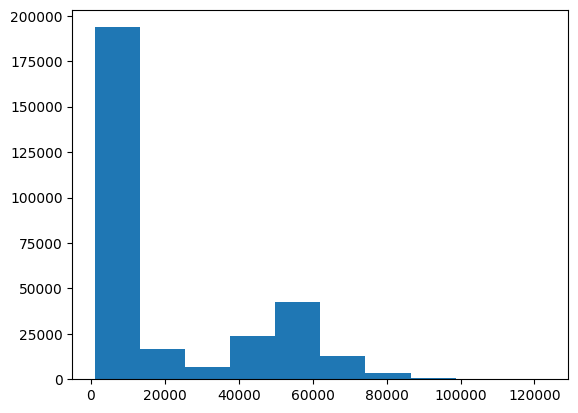

In [ ]:
#Display a histogram to assess distribution of the target variable
df["price"].hist(grid = False)

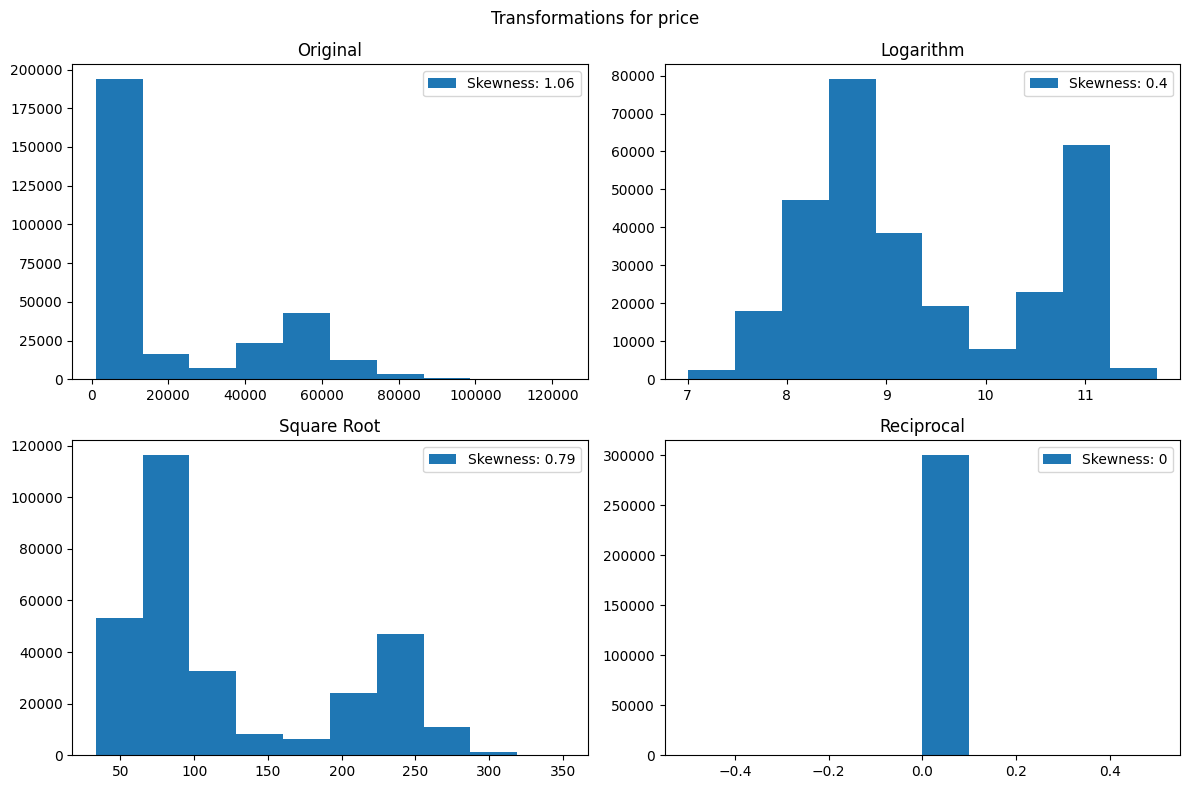

In [ ]:
#Perform transformation analyais to determine the best approach to even the distribution.
def plot_transformations(df, col_name):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    fig.suptitle(f"Transformations for {col_name}")

    transformations = [
        ("Original", df[col_name]),
        ("Logarithm", np.log(df[col_name])),
        ("Square Root", np.sqrt(df[col_name])),
        ("Reciprocal", np.reciprocal(df[col_name])),
    ]

    for (title, transformed_data), ax in zip(transformations, axes.flat):
        ax.hist(transformed_data, label=f"Skewness: {round(transformed_data.skew(), 2)}")
        ax.set_title(title)
        ax.legend(loc="upper right")

    plt.tight_layout()

plot_transformations(df, "price")

In [ ]:
df["price"] = np.log(df["price"])

Observations from Step 4


*   The distribution of the target variable had a positive skew of 1.69, therefore data transformation analysis has been undertaken to deteremine the approiate method to evenly distribute the data, concluding logarithms with a skew of 0.4 is the best approach for reduced skewness.
*   The number of rows are adequate for the model to learn from.



# Step 5: Basic Exploratory Data Analysis

In [ ]:
#Looking at the first 5 rows of data
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,8.691651
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,8.691651
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,8.692154
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,8.691986
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,8.691986


In [ ]:
#Looking at the last 5 rows of data
df.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,11.145695
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,11.252923
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,11.278456
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,11.309401
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,11.309401


In [ ]:
#Observe the summarised information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 27.5+ MB


In [ ]:
#Look at the descriptive statistics of the data
df.describe(include="all")

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,NaN,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,NaN,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,NaN,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,9.330602
std,86646.852011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,1.112786
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,7.007601
25%,75038.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,8.472823
50%,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,8.912608
75%,225114.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,10.657753


In [ ]:
#Finding the unique values for each columns
df.nunique()

Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

Observations from Step 5 - Basic Exploratory Data Analysis



*   All rows and columns contain data.
*   The columns examined in Step 5 (and listed below) are not final, and further study will be undertaken to determine final listing.
              airline: Categorical Selected.
              flight: Categorical Selected.
              source_city: Categorical Selected.
              departure_time: Categorical Selected.
              stops: Categorical Selected.
              arrival_time: Categorical Selected.
              destination_city: Categorical Selected.
              class: Categorical Selected.
              duration: Continuous Selected.
              days_left: Continuous Selected.
              price: Continuous Selected.




# Step 7: Remove Unwanted Columns and Convert Values

In [ ]:
#Remove unwanted catergorical columns
columns_delete = ["Unnamed: 0", "airline", "flight", "source_city", "arrival_time", "destination_city"]
for col in columns_delete:
    try:
      df = df.drop(col, axis=1)
    except KeyError:
      print(f"Column {col}, not found.")
df.head()

,departure_time,stops,class,duration,days_left,price
0,Evening,zero,Economy,2.17,1,8.691651
1,Early_Morning,zero,Economy,2.33,1,8.691651
2,Early_Morning,zero,Economy,2.17,1,8.692154
3,Morning,zero,Economy,2.25,1,8.691986
4,Morning,zero,Economy,2.33,1,8.691986


In [ ]:
df["departure_time"].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [ ]:
df["class"].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [ ]:
df["stops"].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [ ]:
#Converting class and stops columns to numerical type
mapping = {"departure_time": {"Morning": 0, "Early_Morning": 1, "Evening": 2, "Night": 3, "Afternoon": 4, "Late_Night": 5}, "class":
                      {"Economy": 0, "Business": 1}, "stops": {"zero": 0, "one": 1, "two_or_more": 2}}

for col, values in mapping.items():
    try:
        if col in df.columns:
            df[col].replace(values, inplace=True)
        else:
            print(f"Column {col} not found.")
    except:
        print(f"An error occurred while processing column {col}.")

df.head()

,departure_time,stops,class,duration,days_left,price
0,2,0,0,2.17,1,8.691651
1,1,0,0,2.33,1,8.691651
2,1,0,0,2.17,1,8.692154
3,0,0,0,2.25,1,8.691986
4,0,0,0,2.33,1,8.691986


# Step 8: Visual Exporatory Data Analysis

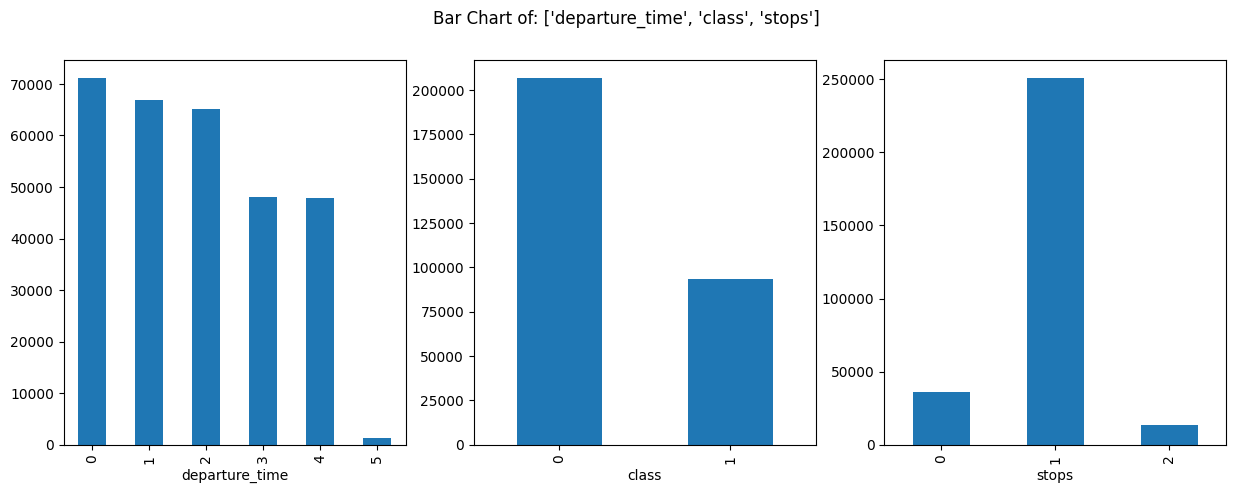

In [ ]:
def plotBarCharts(impData, colsToPlot):
    fig, subPlot = plt.subplots(nrows=1, ncols = len(colsToPlot), figsize=(15,5))
    fig.suptitle("Bar Chart of: "+ str(colsToPlot))

    for colName, ax in zip(colsToPlot, range(len(colsToPlot))):
      df.groupby(colName).size().plot(kind="bar", ax = subPlot[ax])

plotBarCharts(impData = df, colsToPlot = ["departure_time","class", "stops"])

 Observations from Step 8 - Visual Exploratoy Data Analysis


*   There's enough values for observation.
*   1 stop has significantly more values than the other categories.



# Step 9: Visualise Distribution of all the Continuous Variables

array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'days_left'}>]], dtype=object)

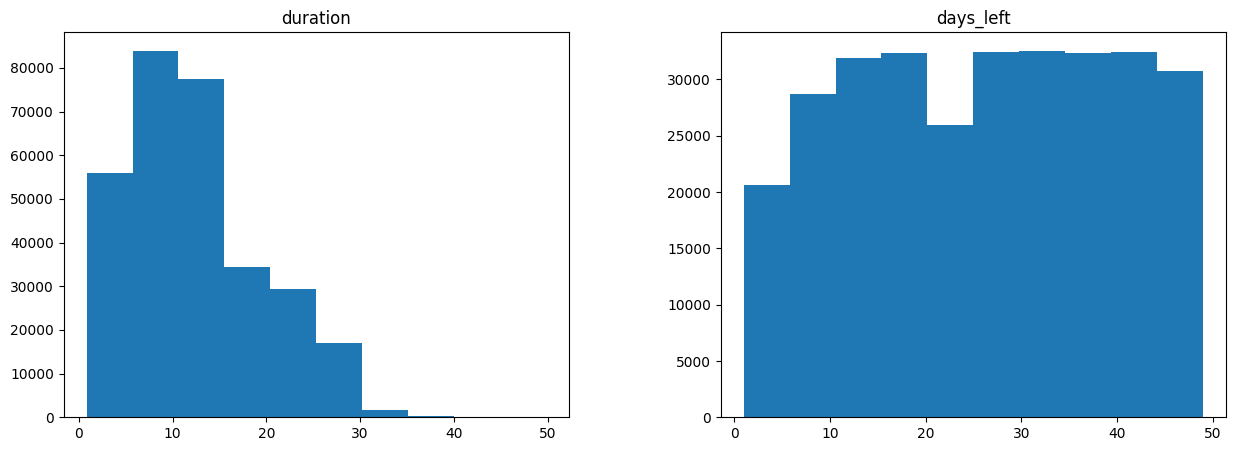

In [ ]:
df.hist(["duration", "days_left"], figsize = (15,5), grid=False)

Observations for Step 9

duration:
*   Selected. Outliers beyond 35 will be treated.
*   The data contained within 'duration' is negatively skewed (left skewed).
---
days_left:
*   Selected. The distribution is good.



# Step 10: Outlier Analysis

In [ ]:
df["duration"][df["duration"]<35].sort_values(ascending = False)

135780    34.92
113517    34.92
158949    34.92
111740    34.92
112627    34.92
          ...  
117728     0.83
119072     0.83
117019     0.83
118086     0.83
197356     0.83
Name: duration, Length: 299704, dtype: float64

In [ ]:
df["duration"][df["duration"]>35] = 34.92

array([[<Axes: title={'center': 'duration'}>]], dtype=object)

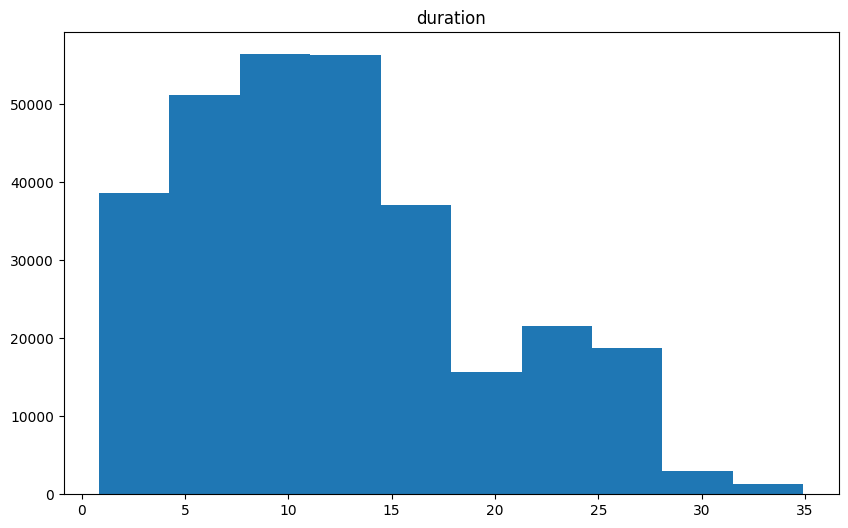

In [ ]:
df.hist(["duration"], figsize = (10,6), grid = False)

Observations from Step 11


*   Analysis undertaken shows the nearest logical value to 35 is 34.92, therefore values above 35 have been replace with it.
*   The distribution has improve after outlier treatment.





# Step 12: Missing Values Analysis

In [ ]:
df.isnull().sum()

departure_time    0
stops             0
class             0
duration          0
days_left         0
price             0
dtype: int64

Observations for Step 12


*   The dataset contains no missing values within it's rows, therefore removal of data is not required.

# Step 13: Feature Selection (Attribute Selection)

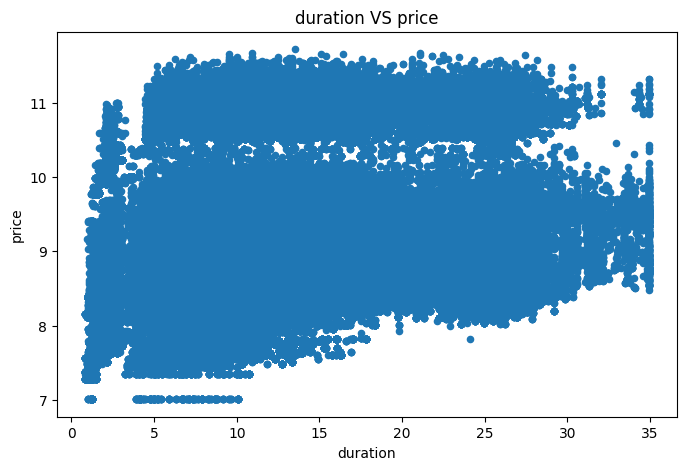

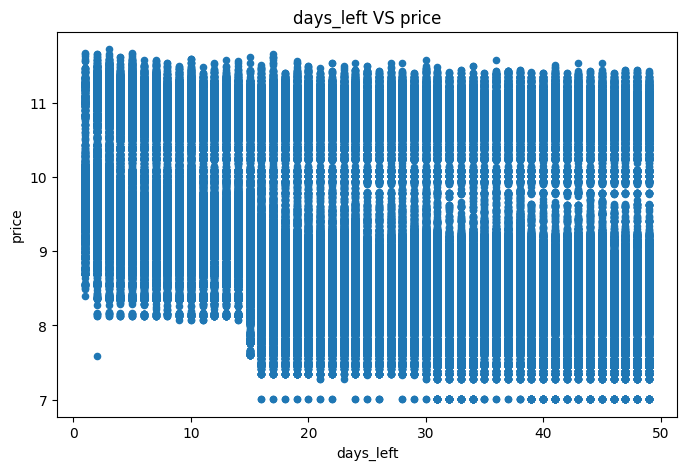

In [ ]:
ContinuousCols = ["duration", "days_left"]
for predictor in ContinuousCols:
  df.plot.scatter(x = predictor, y = "price", figsize = (8,5), title = predictor + " VS " + "price")

Observations for Step 13

* There is not an obvious decernible pattern in the scatter plots.   



# Step 14: Statistical Feature Selection (Continuous Vs Continous) using Correlation value

In [ ]:
continuousCols = ["price", "duration", "days_left"]

correlationData = df[continuousCols].corr()
correlationData

,price,duration,days_left
price,1.000000,0.264720,-0.193535
duration,0.264720,1.000000,-0.038932
days_left,-0.193535,-0.038932,1.000000


In [ ]:
correlationData["price"][abs(correlationData["price"]) > 0.2 ]

price       1.00000
duration    0.26472
Name: price, dtype: float64

Observations from Step 14

*   'days_left' with a correlation of -0.193535 is not correlated with the target variable, therefore will be dropped.
*   'duration' with a correlation of 0.26472 is correlated with the target variable therefore is selected.



# Step 15: Relationship Exploration: Categorical Vs Continuous -- Box Plot

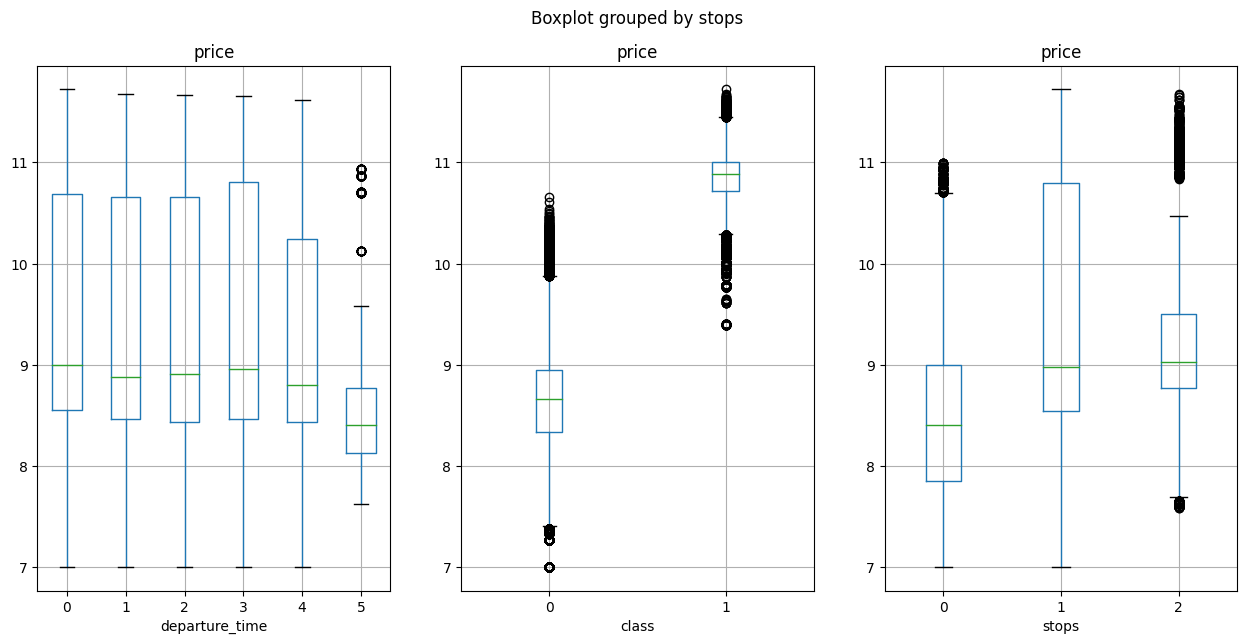

In [ ]:
categoricalCols = ["departure_time","class", "stops"]

fig, plotCanvas = plt.subplots(nrows = 1, ncols = len(categoricalCols), figsize = (15,7))
for predictorCol, i in zip(categoricalCols, range(len(categoricalCols))):
  df.boxplot(column = "price", by = predictorCol, figsize = (5,5), vert = True, ax = plotCanvas[i])

Observations and Interpretations from Step 15: Box-Plots

departure_time:
*   The majority of boxes (Q3 - Q1) are large indicating the middle 50% is broadly spread.
*   'Late Night: 5', contains outliers.
*   The whiskers are mostly equal in length suggesting overall the data is evenly skewed.
---
class:
*   The boxes are small suggesting the middle 50% is compact and the distrbution is concenstrated.
*   Both variables contain a large number of outliers.
*   The whiskers are mostly equal in length suggesting overall the data is evenly skewed.
---
stops:
*   The box for 'stops 2' is larger than the other boxes. This is likely due to the variable containing more data points.
*   The larger number of outliers are found in variable 'stops 2'.
*   'stops 1' and 'stops 2' have whiskers that are equal in length. 'stops 1' has a larger upper whisker, suggesting a skewd distribution.



# Step 16: Statistical Feature Selction (Categorical Vs Continous) using ANOVA Test

In [ ]:
def FunctionAnova(inpData, TargetVariable, categoricalPredictor):
    from scipy.stats import f_oneway
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in categoricalPredictor:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

 #Calling the function to check which categorical variables are correlated with target
categoricalPredictor = ["departure_time","class", "stops"]
df[categoricalPredictor] = df[categoricalPredictor].astype("category")
FunctionAnova(inpData = df,
              TargetVariable = "price",
              categoricalPredictor = categoricalPredictor)

##### ANOVA Results ##### 

departure_time is correlated with price | P-Value: 0.0
class is correlated with price | P-Value: 0.0
stops is correlated with price | P-Value: 0.0


['departure_time', 'class', 'stops']

Observations from Step 16


*   All three variables (departure_time, class and stops) are correlated with the target variable, price.



# Selecting Final Predictors/Features for Building Machine Learning/AI Model

The final features/predictors/columns selected for the machine learning model are:


*   "duration", "departure_time", "class", "stops"



In [ ]:
SelectedColumns = ["duration", "departure_time", "class", "stops"]

DataForML = df[SelectedColumns]
DataForML.head()

,duration,departure_time,class,stops
0,2.17,2,0,0
1,2.33,1,0,0
2,2.17,1,0,0
3,2.25,0,0,0
4,2.33,0,0,0


In [ ]:
DataForML.to_pickle("DataForML.pkl")

# Step 17: Data Pre-Processing for Machine Learning Model Building or Model Development

In [ ]:
DataForML_Numeric = pd.get_dummies(DataForML)

DataForML_Numeric["price"] = df["price"]

DataForML_Numeric.head()

,duration,departure_time_0,departure_time_1,departure_time_2,departure_time_3,departure_time_4,departure_time_5,class_0,class_1,stops_0,stops_1,stops_2,price
0,2.17,False,False,True,False,False,False,True,False,True,False,False,8.691651
1,2.33,False,True,False,False,False,False,True,False,True,False,False,8.691651
2,2.17,False,True,False,False,False,False,True,False,True,False,False,8.692154
3,2.25,True,False,False,False,False,False,True,False,True,False,False,8.691986
4,2.33,True,False,False,False,False,False,True,False,True,False,False,8.691986


# Step 18: Machine Learning Model Development

In [ ]:
DataForML_Numeric.columns


Index(['duration', 'departure_time_0', 'departure_time_1', 'departure_time_2',
       'departure_time_3', 'departure_time_4', 'departure_time_5', 'class_0',
       'class_1', 'stops_0', 'stops_1', 'stops_2', 'price'],
      dtype='object')

In [ ]:
TargetVariable = "price"
Predictors = ['duration', 'departure_time_0', 'departure_time_1', 'departure_time_2', 'departure_time_3', 'departure_time_4', 'departure_time_5', 'class_0', 'class_1', 'stops_0', 'stops_1', 'stops_2']

x = DataForML_Numeric[Predictors].values
y = DataForML_Numeric[TargetVariable].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 428)

# Step 19: Standardisation/Normalisation of Data

I have decided not to run this step.

# Step 20: Multiple Linear Regression Algorithm For ML/AL Model Building

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

RegModel = LinearRegression()

print(RegModel)

LREG = RegModel.fit(x_train, y_train)
prediction = LREG.predict(x_test)

print("R2 Values:", metrics.r2_score(y_train, LREG.predict(x_train)))

print("\n##### Model Validation and Accuracy Calculator ######")

TestingDataResults = pd.DataFrame(data = x_test, columns = Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults[('Predicted' + TargetVariable)] = np.round(prediction)

print(TestingDataResults.head())

TestingDataResults["APE"] = 100 * ((abs(
TestingDataResults["price"]-TestingDataResults["Predictedprice"]))/TestingDataResults["price"])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy = 100 - MAPE
MedianAccuracy= 100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Values: 0.8604782706263272

##### Model Validation and Accuracy Calculator ######
  duration departure_time_0 departure_time_1 departure_time_2  \
0     2.42            False             True            False   
1    24.42            False            False             True   
2    13.08            False            False            False   
3     1.17             True            False            False   
4    24.08            False            False            False   

  departure_time_3 departure_time_4 departure_time_5 class_0 class_1 stops_0  \
0            False            False            False    True   False    True   
1            False            False            False   False    True   False   
2             True            False            False    True   False   False   
3            False            False            False    True   False    True   
4             True            False            False   False    True   False   

  stops_1 stops_2      p

# Step 21: AdaBoost Algorrithm For ML/AL Model Building

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.8643745593350078

##### Model Validation and Accuracy Calculations ##########
  duration departure_time_0 departure_time_1 departure_time_2  \
0     2.42            False             True            False   
1    24.42            False            False             True   
2    13.08            False            False            False   
3     1.17             True            False            False   
4    24.08            False            False            False   

  departure_time_3 departure_time_4 departure_time_5 class_0 class_1 stops_0  \
0            False            False            False    True   False    True   
1            False            False            False   False    True   False   
2             True            False            False    True   False   False   
3            False            False            False    True   False    Tr

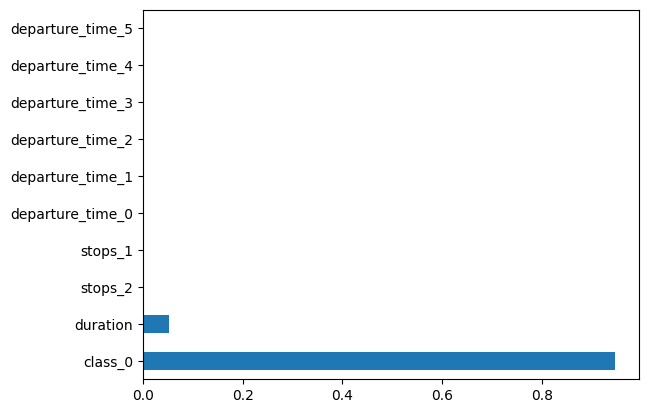

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

print(RegModel)

AB = RegModel.fit(x_train,y_train)
prediction = AB.predict(x_test)

print('R2 Value:',metrics.r2_score(y_train, AB.predict(x_train)))

feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

print('\n##### Model Validation and Accuracy Calculations ##########')

TestingDataResults=pd.DataFrame(data = x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

print(TestingDataResults.head())

TestingDataResults['APE'] = 100 * ((abs(TestingDataResults["price"]-TestingDataResults["Predictedprice"]))/TestingDataResults["price"])
MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])
Accuracy = 100 - MAPE
MedianAccuracy = 100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Pickle the Trained Model

In [ ]:
import pickle

with open('final_model.pkl', 'wb') as file:
    pickle.dump(LREG, file)

# References

*   https://www.kaggle.com/code/setu06/handling-with-highly-skewed-data-set
*   https://medium.com/@einsteinmunachiso/saving-your-machine-learning-model-in-python-pickle-dump-b01ae60a791c

